In [1]:
import pandas as pd

# Import pandas as pd
filename_labels = 'Data/Labels.txt'
file_cell_line_name = "Data/Cell_line_IDs.txt"
file_drug_name = "Data/Drug_PubChem_IDs.txt"

# Read Cell Line Names into list
with open(file_cell_line_name) as f:
    cell_lines = [line.strip() for line in f]

# Read Drug Names into list
with open(file_drug_name) as f:
    drugs = [line.strip() for line in f]


data = pd.read_csv(filename_labels, sep = "\t", header=None, names=cell_lines)
data["drug_id"] = drugs
data.set_index("drug_id", inplace=True)
data.shape
# Print out
data.head()

,ES3,ES5,EW-11,NCI-H1395,NCI-H1770,DMS-114,NCI-H1092,NCI-H2141,NCI-H345,NCI-H446,...,D-502MG,EW-3,EW-1,EW-18,EW-24,LAN-6,NB10,NB6,NB5,NB14
drug_id,,,,,,,,,,,,,,,,,,,,,
176870,5.457453,6.177945,3.954488,5.429563,6.239001,6.439408,5.322913,5.481543,5.701747,5.829406,...,2.853407,4.907507,3.862042,6.281844,-0.520144,5.284207,2.464594,3.128087,2.331174,5.788405
5284616,2.712723,2.713280,0.083814,0.926814,2.125850,-1.892659,1.661186,1.155157,-0.058457,0.278546,...,1.145465,2.363574,-6.132267,1.956273,2.170812,2.116257,0.382757,1.157696,5.900698,1.412155
5329102,3.624351,3.208216,3.540163,6.187608,2.676693,4.345598,5.835351,3.639802,5.687395,3.313991,...,6.892013,1.861296,1.543108,7.450205,6.305561,2.656457,7.379108,4.617955,4.390978,2.391296
10461815,5.741999,2.671871,5.191223,2.379769,4.042987,5.904581,5.305583,4.700236,6.133696,6.221338,...,4.200647,4.961017,6.038975,3.709424,5.878941,5.791552,6.379263,5.592871,6.070821,2.972592
462382,1.465161,1.482183,2.443964,4.074435,5.051646,0.368378,-0.945622,0.514722,3.047581,4.602755,...,0.514084,4.552909,-1.558431,0.704762,3.476532,-1.161549,2.078887,3.432384,4.253437,4.990988


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score,silhouette_score

ks = range(2,50,1)
calinski_harabaz_scores = []
silhouette_scores = []
inertias = []
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    pred = kmeans.labels_
    calinski_harabaz_scores.append(calinski_harabaz_score(data, pred))
    silhouette_scores.append(silhouette_score(data,pred))
    inertias.append(kmeans.inertia_)

from sympy.geometry import Point
from sympy.geometry import Segment
distances = []

for i, k in enumerate(ks):
    p1 = Point(ks[0],inertias[0])
    p2 = Point(ks[-1],inertias[-1])
    p = Point(k,inertias[i])
    seg = Segment(p1, p2)
    distances.append(seg.distance(p))

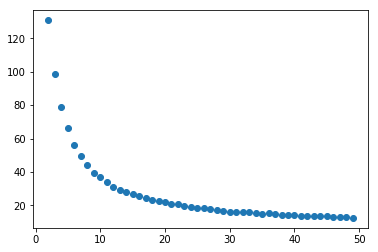

In [15]:
import matplotlib.pyplot as plt
plt.scatter(ks, calinski_harabaz_scores)

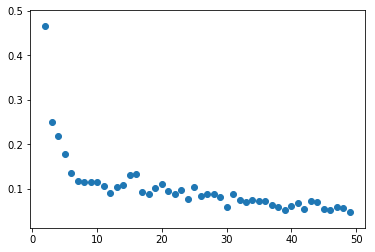

In [16]:
plt.scatter(ks, silhouette_scores)

8


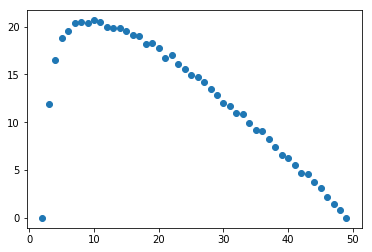

In [17]:
import numpy as np
plt.scatter(ks, distances)
print(np.argmax(distances))

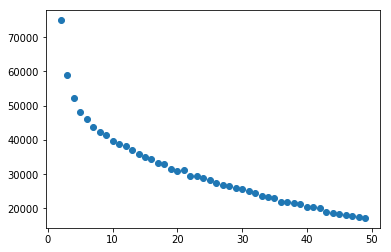

In [18]:
plt.scatter(ks, inertias)

In [22]:
k = 8

kmeans = KMeans(n_clusters=k, random_state=0, algorithm="full", init = 'k-means++').fit(data)

param_df = pd.DataFrame(data=kmeans.cluster_centers_,    # values
            columns=data.columns,
            index=[str(i) for i in range(k)])  # 1st row as the column names
param_df["Cluster"] = range(k)
print(param_df.columns)
param_df.loc["std"]=[np.std(param_df[column]) for column in param_df.columns]
new = param_df.sort_values("std",axis=1, ascending=False)
new.head(9)


Index(['ES3', 'ES5', 'EW-11', 'NCI-H1395', 'NCI-H1770', 'DMS-114', 'NCI-H1092',
       'NCI-H2141', 'NCI-H345', 'NCI-H446',
       ...
       'EW-3', 'EW-1', 'EW-18', 'EW-24', 'LAN-6', 'NB10', 'NB6', 'NB5', 'NB14',
       'Cluster'],
      dtype='object', length=125)


,GT3TKB,TE-10,EW-1,NCI-H446,697,LU-134-A,NCI-SNU-5,Becker,Ramos-2G6-4C10,LS-411N,...,COLO-824,P31-FUJ,JVM-2,MFM-223,D-502MG,SW684,SNU-C1,RCC10RGB,Cluster,CW-2
0,1.444827,1.320373,1.340023,5.007821,0.893528,3.942741,4.433492,3.157772,2.288659,0.466295,...,3.444890,5.856500,4.586016,6.143242,4.590698,5.139178,5.035389,3.243946,0.000000,6.884564
1,-5.894549,-4.977325,-5.157872,-3.694787,-5.639601,-3.762828,-3.503822,-4.736033,-5.195637,-4.282165,...,-2.227358,-0.999320,-1.308796,-1.324686,-2.642142,-1.800937,-0.380837,-1.511737,1.000000,0.900853
2,0.720997,1.276836,0.177745,2.421973,-0.684365,0.797931,1.140591,0.685053,1.286955,0.852824,...,2.392678,4.330715,2.305839,2.876500,2.416759,2.443906,2.024877,2.470780,2.000000,3.684376
3,6.802450,6.716807,5.815640,7.091447,5.144041,7.208213,7.429023,6.687263,6.071590,6.388595,...,6.991634,7.824665,7.003647,6.920453,6.630549,6.733697,7.342001,6.658099,3.000000,7.682165
4,3.035705,2.415950,3.108200,4.907261,1.202734,4.077706,4.328597,2.536187,3.200542,2.970637,...,4.635482,5.388294,3.520081,5.175246,3.431925,4.403442,4.241659,3.341915,4.000000,5.125647
5,-2.876952,-3.856856,-3.668135,-2.093304,-4.603814,-1.885997,-1.738551,-3.010943,-2.547329,-3.996688,...,1.344740,2.930243,0.749630,2.703708,1.841143,1.507766,0.341466,1.450941,5.000000,3.490517
6,4.909631,4.935074,4.656310,6.210581,3.231849,5.591446,5.576320,4.613639,3.920767,4.575416,...,5.628712,6.343180,4.903236,6.052066,4.783946,5.242993,5.424153,4.805319,6.000000,6.376028
7,-1.178410,-1.039370,-2.557110,0.348250,-4.043723,-0.592798,-0.468763,-0.652055,-2.499108,-1.291703,...,1.254779,1.686881,-0.238919,1.652786,1.436616,1.732198,2.821450,1.108704,7.000000,3.325984
std,3.881853,3.769032,3.739381,3.725568,3.647614,3.614990,3.614757,3.606111,3.601720,3.596171,...,2.719377,2.665952,2.652155,2.624731,2.616201,2.560854,2.471821,2.310042,2.291288,2.105634


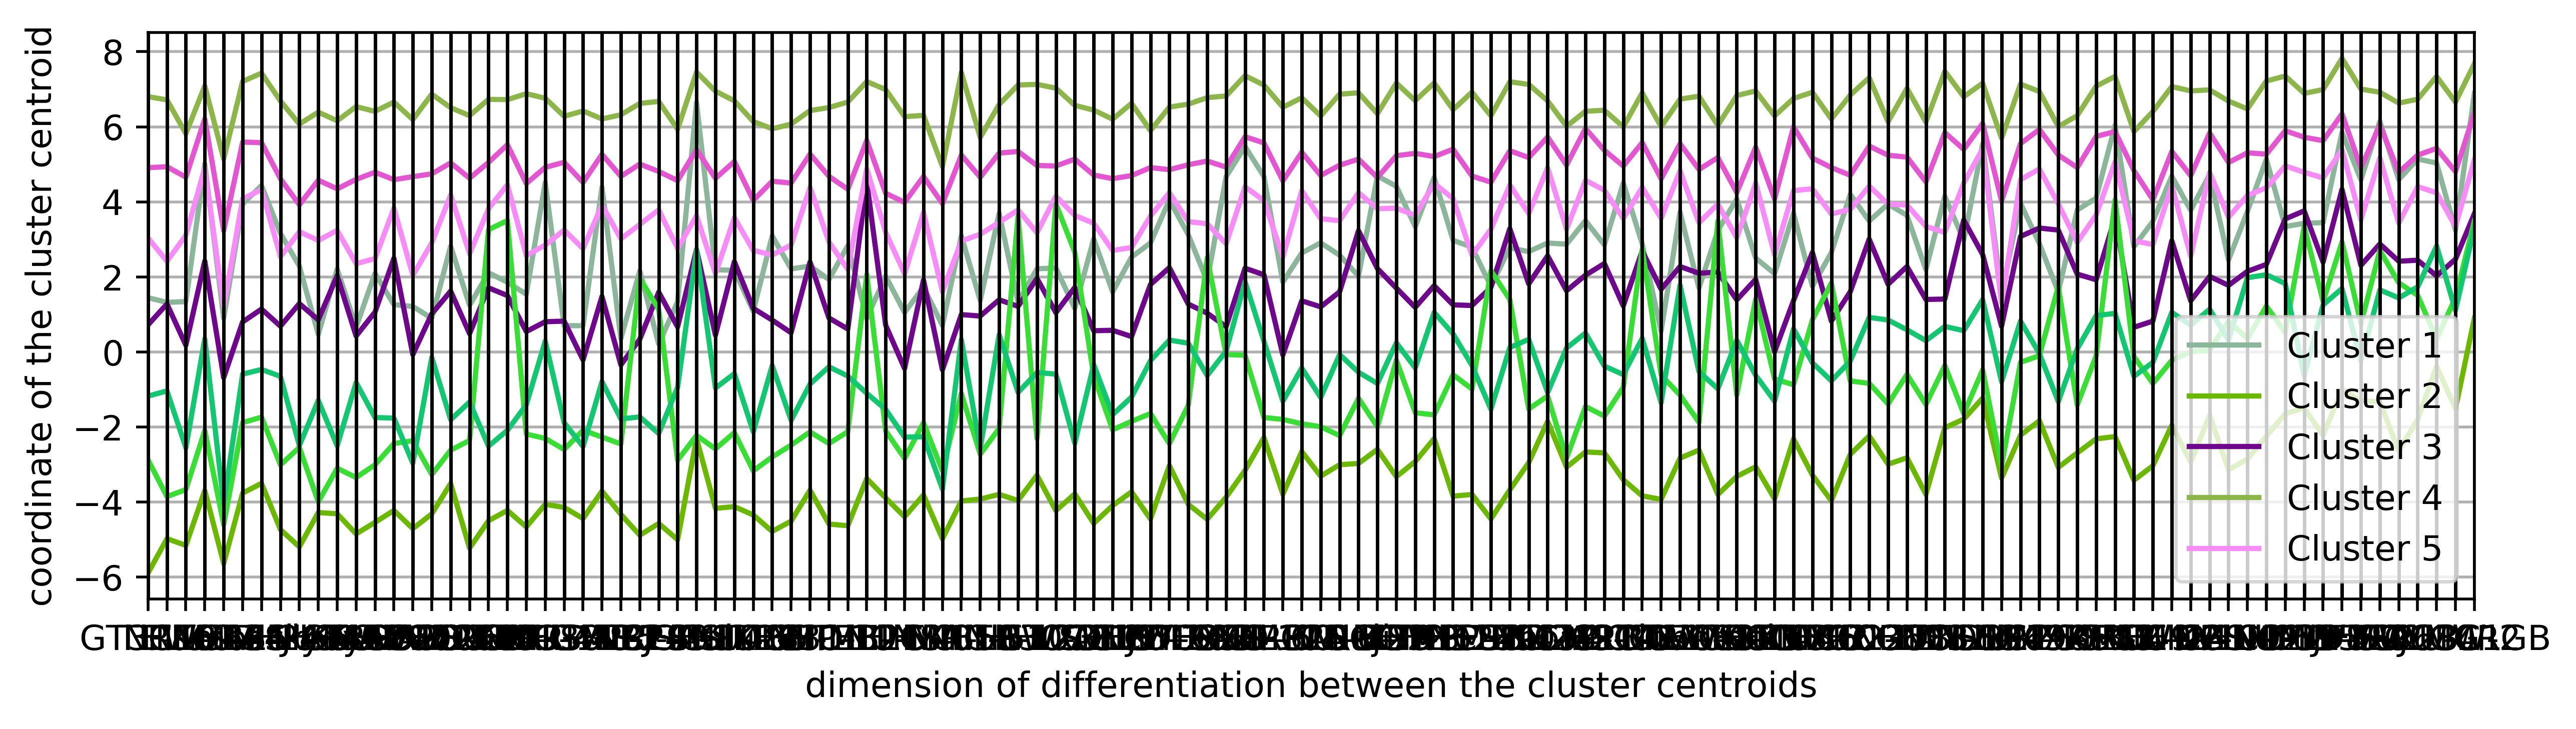

In [25]:
columns_to_show = new.columns[:225]
plt.figure(figsize=(12,3), dpi=500)
pd.plotting.parallel_coordinates(new.loc["0":"7", columns_to_show], "Cluster")
plt.xlabel("dimension of differentiation between the cluster centroids")
plt.ylabel("coordinate of the cluster centroid")
plt.legend(labels=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.show()